In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']

In [3]:
ds=pd.read_csv('adult.data', names=col_names, index_col=False)
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

In [5]:
ds['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

Categorical features

In [6]:
import category_encoders as ce

In [7]:
ds.dtypes[ds.dtypes=='object'].index

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [8]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,inc_class_0,inc_class_1
0,39,0,0,0,1,77516,0,0,0,0,...,0,40,0,0,0,0,0,1,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,0,13,0,0,0,0,0,1,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
4,28,0,0,1,1,338409,0,0,0,0,...,0,40,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,1,1,257302,0,0,1,1,...,0,38,0,0,0,0,0,1,0,1
32557,40,0,0,1,1,154374,0,0,0,1,...,0,40,0,0,0,0,0,1,1,0
32558,58,0,0,1,1,151910,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
32559,22,0,0,1,1,201490,0,0,0,1,...,0,20,0,0,0,0,0,1,0,1


Algorithms

In [9]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

In [10]:
X_train_c.shape

(21815, 36)

Dimensionality reduction

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

PCA

In [12]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


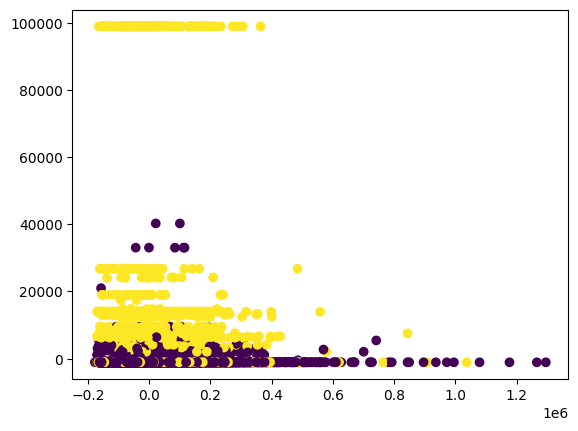

In [13]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)

TSNE

In [14]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

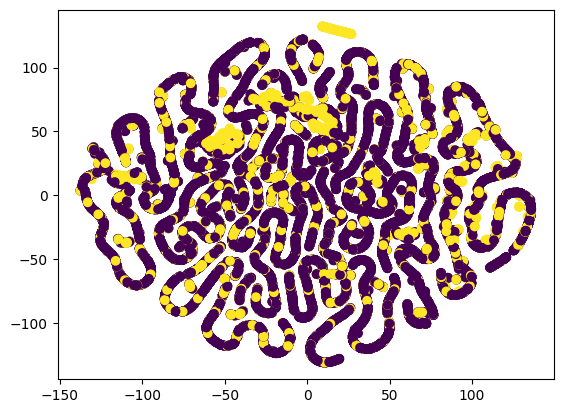

In [15]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

Clustering

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering

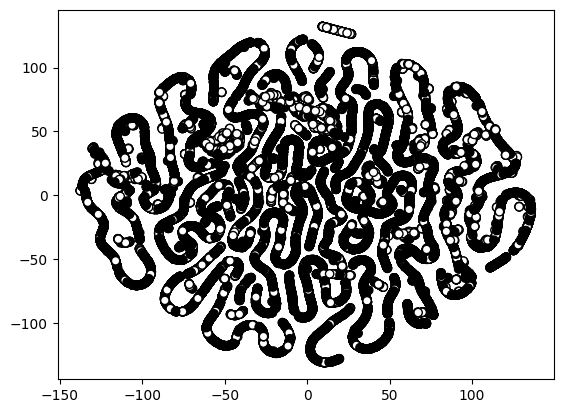

In [17]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=y_clf, cmap='gray')

K-means

In [18]:
clst=KMeans(n_clusters=5).fit(x_tsne_clf)

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


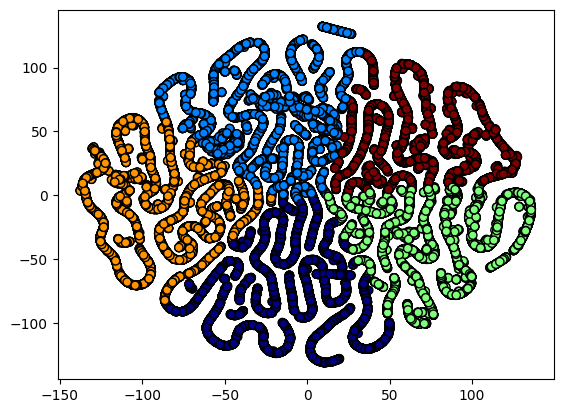

In [19]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=clst.labels_, cmap='jet')

In [20]:
clst.labels_

array([1, 1, 4, ..., 1, 2, 4])

In [21]:
clst.cluster_centers_

array([[-11.217859, -70.38791 ],
       [-21.58427 ,  61.685566],
       [ 72.65366 , -34.691555],
       [-84.55954 ,  -6.342998],
       [ 64.602356,  45.77415 ]], dtype=float32)

In [22]:
daryn=np.array([[ 23.003283 ,  45.699173 ],
       [ 52.395187 ,  -7.5174   ],
       [-44.995434 , -20.133066 ],
       [-38.62873  ,  41.010876 ],
       [  7.7604003, -53.436024 ]])

daniyar=np.array([[-27.395172 , -43.460205 ],
       [ -1.3509645,  54.745056 ],
       [ 46.7869   ,  15.957848 ],
       [-50.77197  ,  14.290402 ],
       [ 34.526375 , -43.987835 ]])

azhar=np.array([[ 27.797762 ,  45.99722  ],
       [  3.0415657, -53.12648  ],
       [-50.01948  , -18.833288 ],
       [-32.272396 ,  39.364723 ],
       [ 50.3723   , -12.114204 ]])

asem=np.array([[-39.709908, -33.705173],
       [ 54.19239 ,   6.198991],
       [-46.485382,  28.100378],
       [ 20.27243 , -47.374187],
       [ 10.277529,  49.675636]])

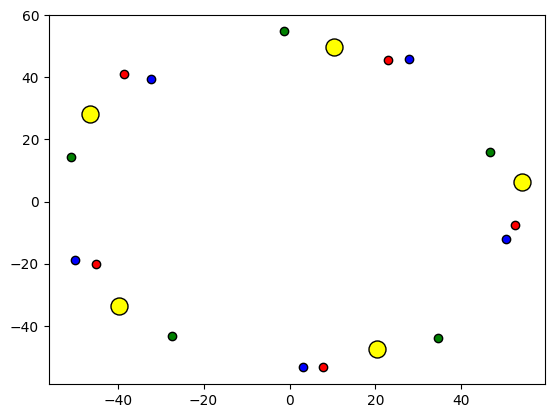

In [23]:
plt.scatter(daryn[:,0], daryn[:,1], edgecolor='black',  color='red')
plt.scatter(daniyar[:,0], daniyar[:,1], edgecolor='black', color='green')
plt.scatter(azhar[:,0], azhar[:,1], edgecolor='black', color='blue')
plt.scatter(asem[:,0], asem[:,1], edgecolor='black', color='yellow', s=150)

In [24]:
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics import pairwise_distances

In [25]:
mx1=pairwise_distances(daryn, asem)

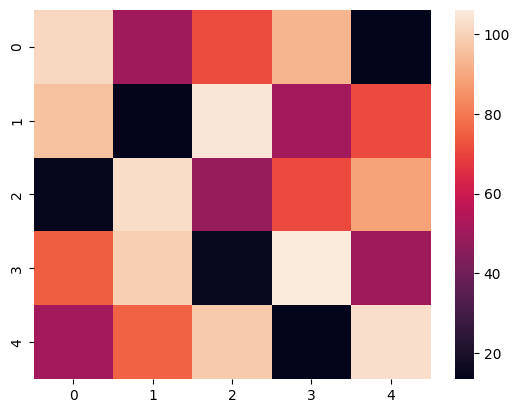

In [26]:
import seaborn as sns; #sns.set_theme()
ax = sns.heatmap(mx1)

In [27]:
mx1

array([[101.18297529,  50.32916424,  71.68257912,  93.11341418,
         13.33255688],
       [ 95.75566813,  13.83363006, 105.09991929,  51.19018448,
         71.02774445],
       [ 14.56498793, 102.6235921 ,  48.25645102,  70.72462615,
         89.0413124 ],
       [ 74.72387118,  99.13439189,  15.11317105, 106.2133043 ,
         49.66789944],
       [ 51.40755442,  75.57952554,  97.93257756,  13.90312033,
        103.14237909]])

In [28]:
mx2=pairwise_distances(daryn, azhar)

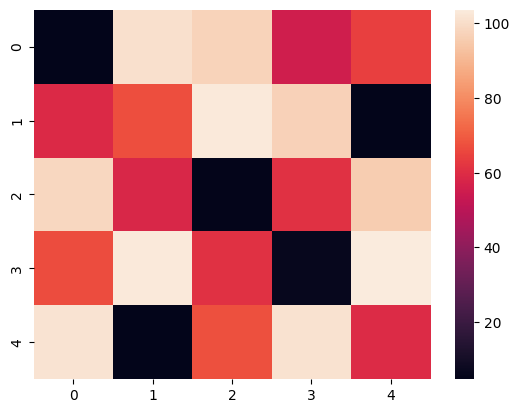

In [29]:
ax2 = sns.heatmap(mx2)

Agglomerative

In [30]:
clst2=AgglomerativeClustering(n_clusters=5).fit(x_tsne_clf[:,:])#, distance_threshold=100 

In [31]:
print(clst2.n_clusters)

5


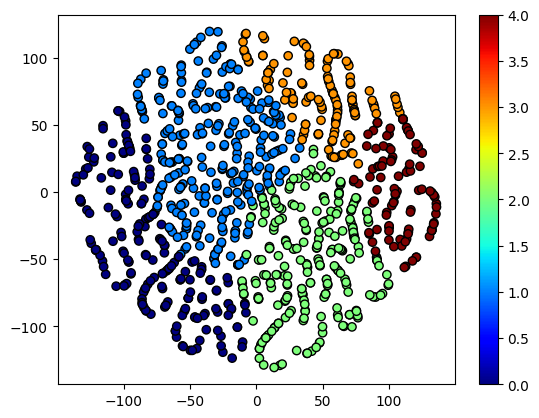

In [32]:
plt.scatter(x_tsne_clf[:1000,0], x_tsne_clf[:1000,1], edgecolor='black', c=clst2.labels_[:1000], cmap='jet')
plt.colorbar()

In [33]:
set(clst2.labels_)

{0, 1, 2, 3, 4}

In [34]:
clst.labels_.shape

(32561,)

C:\Users\Sagat\AppData\Local\Temp\ipykernel_3524\3081347572.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clst.labels_[:1000], clst2.labels_[:1000], edgecolor='black',  cmap='jet')


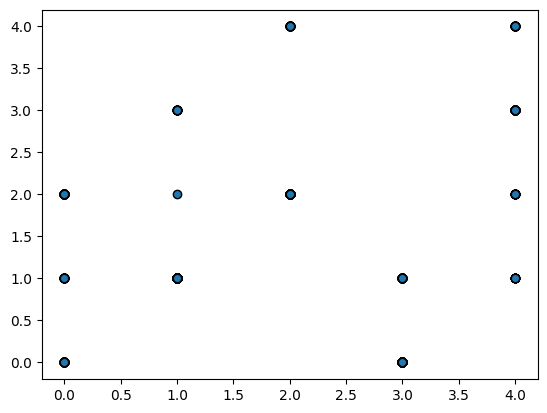

In [35]:
plt.scatter(clst.labels_[:1000], clst2.labels_[:1000], edgecolor='black',  cmap='jet')

In [36]:
df_clust=ds_clf_bin_enc.iloc[:1000,:]#.copy()
df_clust['clust']=clst2.labels_[:1000]
df_clust['target']=y_clf[:1000]
df_clust.groupby(['clust','target']).mean().T

C:\Users\Sagat\AppData\Local\Temp\ipykernel_3524\2046913908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['clust']=clst2.labels_[:1000]
C:\Users\Sagat\AppData\Local\Temp\ipykernel_3524\2046913908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['target']=y_clf[:1000]


clust                        0                            1                 \
target                       0             1              0              1   
age                  38.766467     43.837209      38.538793      42.293333   
workclass_0           0.000000      0.000000       0.000000       0.000000   
workclass_1           0.245509      0.255814       0.146552       0.120000   
workclass_2           0.874251      0.790698       0.918103       0.880000   
workclass_3           0.814371      0.837209       0.801724       0.906667   
fnlwgt            84410.269461  85234.000000  139538.025862  140554.653333   
education_0           0.005988      0.000000       0.004310       0.013333   
education_1           0.107784      0.255814       0.086207       0.120000   
education_2           0.407186      0.348837       0.383621       0.266667   
education_3           0.724551      0.488372       0.732759       0.440000   
education_4           0.287425      0.418605       0.241379       0.506667   
education-num         9.634731     11.488372       9.896552      11.866667   
marital-status_0      0.071856      0.046512       0.086207       0.013333   
marital-status_1      0.574850      0.883721       0.607759       0.946667   
marital-status_2      0.610778      0.209302       0.637931       0.106667   
occupation_0          0.299401      0.232558       0.310345       0.120000   
occupation_1          0.532934      0.372093       0.560345       0.440000   
occupation_2          0.425150      0.558140       0.508621       0.666667   
occupation_3          0.538922      0.279070       0.482759       0.253333   
relationship_0        0.347305      0.069767       0.275862       0.013333   
relationship_1        0.383234      0.790698       0.357759       0.893333   
relationship_2        0.485030      0.325581       0.538793       0.226667   
race_0                0.041916      0.000000       0.017241       0.000000   
race_1                0.071856      0.046512       0.155172       0.133333   
race_2                0.922156      0.976744       0.875000       0.960000   
sex_0                 0.389222      0.255814       0.396552       0.146667   
sex_1                 0.610778      0.744186       0.603448       0.853333   
capital-gain         43.916168    655.069767     254.646552    3804.440000   
capital-loss        122.952096    283.372093      39.017241     175.706667   
hours-per-week       38.838323     42.883721      39.047414      45.920000   
native-country_0      0.000000      0.000000       0.000000       0.000000   
native-country_1      0.023952      0.000000       0.008621       0.026667   
native-country_2      0.053892      0.023256       0.038793       0.040000   
native-country_3      0.029940      0.023256       0.073276       0.106667   
native-country_4      0.017964      0.000000       0.047414       0.026667   
native-country_5      0.958084      1.000000       0.956897       0.960000   

clust                         2                             3                 \
target                        0              1              0              1   
age                   34.154229      45.433962      34.284211      42.228571   
workclass_0            0.000000       0.000000       0.000000       0.000000   
workclass_1            0.134328       0.226415       0.252632       0.114286   
workclass_2            0.905473       0.830189       0.821053       0.942857   
workclass_3            0.835821       0.867925       0.894737       0.828571   
fnlwgt            228681.268657  215604.433962  258483.894737  244153.885714   
education_0            0.019900       0.000000       0.010526       0.000000   
education_1            0.124378       0.132075       0.157895       0.257143   
education_2            0.383085       0.377358       0.484211       0.171429   
education_3            0.706468       0.584906       0.663158       0.542857   
education_4            0.283582       0.320755       0.284211       0.40000

Dendogram

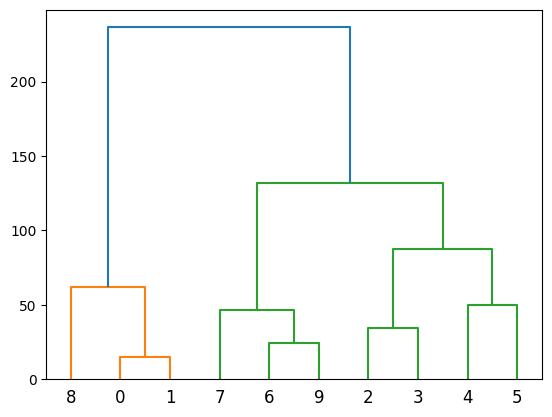

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = x_tsne_clf[:10,0]#[4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = x_tsne_clf[:10,1]#[21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

Classification with clustering features

with clustering features

In [38]:
ds_clst=ds_clf_bin_enc.copy()
ds_clst['clst']=clst2.labels_
be=ce.BinaryEncoder(cols=['clst'])
ds_clst=be.fit_transform(ds_clst)
ds_clst.head()

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,clst_0,clst_1,clst_2
0,39,0,0,0,1,77516,0,0,0,0,...,40,0,0,0,0,0,1,0,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,13,0,0,0,0,0,1,0,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,40,0,0,0,0,0,1,0,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,40,0,0,0,0,0,1,0,1,0
4,28,0,0,1,1,338409,0,0,0,0,...,40,0,0,0,0,1,0,0,1,1


In [39]:
xtr,xtst,ytr,yts=train_test_split(ds_clst, y_clf)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf=DecisionTreeClassifier()
clf.fit(xtr,ytr)
clf.score(xtst,yts)

0.806411988699177

No clustering features

In [41]:
clf=DecisionTreeClassifier()
clf.fit(X_train_c,y_train_c)
clf.score(X_test_c,y_test_c)

0.8063465475525777